In [1]:
import pandas as pd
import os

In [2]:
#import torch

In [3]:
#torch.cuda.is_available()

In [4]:
#torch.__version__

In [3]:
topic = 'aborto'
scheme = 'EI'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_train.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/aborto/EI'

In [4]:
train = pd.read_csv(train_file)

In [5]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,Label_EIII,Stance_EIII,Label_EIII_v2,Stance_EIII_v2,Date
0,1162336260989554689,Impactante pelicula que muestra la realidad de...,0,Uknown,-1,Against,-1,Against,0,Uknown,NaN
1,1163279343612780544,"@jorgevillenal es tibio.¡¡\npor tanto, @juliog...",0,Uknown,0,Uknown,0,Uknown,0,Uknown,NaN
2,1163630215425187840,en un fallo celebrado por promotores del #abor...,0,Uknown,1,Favor,0,Uknown,0,Uknown,NaN
3,1163688994749714434,"absuelta evelyn hernández, de 21 años, condena...",0,Uknown,0,Uknown,0,Uknown,0,Uknown,NaN
4,1164067106725322753,#eeuu: entra en vigor un recorte de 60 millone...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,NaN


In [6]:
train = train[[f'Label_{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [7]:
train.head()

,Label,Tweet
0,0,Impactante pelicula que muestra la realidad de...
1,0,"@jorgevillenal es tibio.¡¡\npor tanto, @juliog..."
2,0,en un fallo celebrado por promotores del #abor...
3,0,"absuelta evelyn hernández, de 21 años, condena..."
4,0,#eeuu: entra en vigor un recorte de 60 millone...


In [8]:
train.Label.unique()

array([ 0, -1,  1])

In [9]:
train = train.query('Label != 0')
train.Label.unique()

array([-1,  1])

In [10]:
train.groupby('Label').count()

,Tweet
Label,
-1,2483
1,3200


In [11]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Tema,Stance
0,@metroposfera @ericahenriquezo prensa tendenci...,aborto,N
1,sonríe siempre 😄 hay mil motivos para ser feli...,aborto,N
2,hoy las mujeres argentinas somos más libres.,aborto,F
3,el niño por nacer es un ser humano a partir de...,aborto,C
4,"mainumby, la conozco, y a su madre. por varios...",aborto,F


In [12]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['N', 'F', 'C'], dtype=object)

In [13]:
test['Stance']= test.Stance.replace({'F':1, 'N':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

array([-1,  1])

In [14]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,103
1,220


In [15]:
train.shape, test.shape

((5683, 2), (323, 2))

# clean data

In [16]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
import cleandata as cd

In [17]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

# save data

In [18]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [19]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

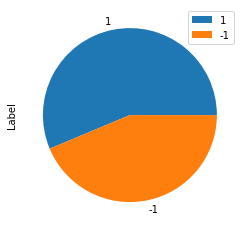

In [20]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

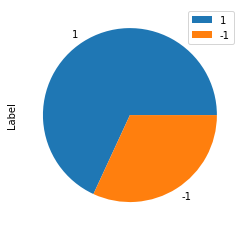

In [21]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

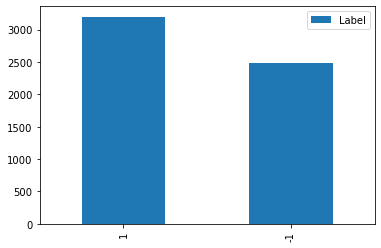

In [22]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

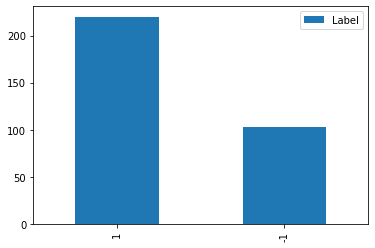

In [23]:
test['Label'].value_counts().plot.bar(legend=True)

In [24]:
train

,Label,Tweet
0,-1,"""el #aborto es un crimen, no caigas en la tram..."
1,1,"""¡carajx, no son señoras, son niñas y tienen 1..."
2,-1,"la mujer embarazada necesita apoyo, no un #abo..."
3,1,#abortolegalya porque ninguna mujer debe ser o...
4,-1,"""mi madre creyó que dios tenía un plan para mi..."
...,...,...
5678,-1,"Ante la persecución , de los Nuevos Herodes de..."
5679,-1,#SenadoresVotenVida #NoMatenInocentes #SiALaVi...
5680,-1,#SenadoresVotenVida #NoMatenInocentes #SiALaVi...
5681,-1,#SenadoresVotenVida #NoMatenInocentes #SiALaVi...


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683 entries, 0 to 5682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5683 non-null   int64 
 1   Tweet   5683 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   323 non-null    int64 
 1   Tweet   323 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [27]:
train = train.dropna(axis=0)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5683 entries, 0 to 5682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5683 non-null   int64 
 1   Tweet   5683 non-null   object
dtypes: int64(1), object(1)
memory usage: 133.2+ KB


# Training

In [29]:
from fastai.text import *

In [30]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.1)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [31]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,""" ¡ fueron violadas "" debate sobre el # aborto en # ecuador y en el mundo entero xxup url xxbos la mujer embarazada necesita apoyo , no un # aborto . xxup url xxbos # abortolegalya porque ninguna mujer debe ser obligada a ser madre , porque no somos ciudadanas de segunda y nuestra autonomía no está al servicio de los antiderechos . mi cuerpo es mío y yo"
1,"xxunk xxup url xxbos quienes deciden abortar en méxico lo hacen con o sin el estado . por eso existen los grupos de acompañamiento , mujeres xxunk que apoyan a otras en la interrupción de su embarazo , aún arriesgando su libertad xxup url xxup url xxbos antes se le xxunk como verde xxunk y se xxunk por la poca xxunk del color xxunk xxunk en el feminismo . hoy"
2,"iniciativa de despenalización de aborto . ¡ mucha fuerza y apoyo a nuestras compañeras xxunk ! xxup url xxbos un xxunk para xxup user porque es de las muy pocas xxunk de hidalgo que está siendo xxunk con los principios de morena . xxbos # xxunk se xxunk en tucumán la acción de la colectiva # lastesis . en la provincia de xxunk , xxunk por su sobrina por abuso"
3,"xxunk los relatos de médicos que xxunk sobre los xxunk del aborto clandestino "" salvemos miles de vida "" , propone la iniciativa que puebla hoy las xxunk en la vía pública de xxup url xxbos ¿ no podés participar pero xxunk el aborto legal ? xxunk tu foto a xxunk con tu pañuelo y xxunk xxunk . xxunk tu localidad , xxunk , xxunk o xxunk y sumate a"
4,". # abortolegalya || ( xxunk _ _ / ) || ( xxunk ) || / xxbos yo fucking oaxaca xxbos por nuestro derecho a decidir , por las miles de mujeres que han muerto por abortos mal practicados , por las mujeres presas xxunk de abortar , por nosotras # 28s # xxunk # abortolegalya foto : xxup user xxup url xxbos en latinoamérica hay muertas y presas a"


In [32]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, valid_df=test, vocab=data_lm.vocab, text_cols = 'Tweet', label_cols = 'Label',bs=32)
# data_clas = (TextList.from_folder(path_nn_model, vocab=data_lm.vocab)
#              .split_by_folder(valid=f'test_{topic}')
#              .label_from_folder(classes=[-1,1])
#              .databunch(bs=32))

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [33]:
data_clas.show_batch()

text,target
"xxbos “ xxmaj no existe aborto seguro ” xxup no xxup mamita xxup pero xxup seguro xxup es xxup mejor y xxup más xxup seguro xxup xxunk xxup con xxup un xxup doctor , xxup en xxup un xxup hospital xxup que xxup estudio xxup más xxup de 6 xxup años xxup para xxup eso , xxup que xxup con xxup el xxup xxunk xxup de xxup la xxup xxunk",1
xxbos # xxup argentina xxup xxunk ! ! xxup el xxup aborto xxup voluntario xxup hasta xxup la xxup semana 14 xxup de xxup embarazo xxup xxunk xxup son xxup en xxup la xxup semana 14 ! xxup bebito xxup xxunk xxup sus xxup piernas xxup xxunk xxup el xxup xxunk xxup en xxup el xxup vientre xxup de xxup su xxup madre ! xxup xxunk ! ! xxup que,-1
xxbos xxup señores xxup senadores xxup el xxup proyecto xxup de xxup ley xxup de xxup aborto xxup legal xxup seguro y xxup gratuito xxup es xxup un xxup proyecto xxup de xxup ley xxup xxunk xxup al xxup congreso xxup por xxup el xxup presidente xxup de xxup la xxup nación xxup alberto xxup fernandez xxrep 4 . xxup uds . xxup no xxup saben xxup lo xxup que,1
"xxbos xxup legalizaron xxup el xxup aborto , xxup el 2021 xxup va xxup hacer xxup un xxup xxunk y xxup ustedes xxup diputados xxup xxunk a xxup que xxup maten a xxup la xxup humanidad , xxup se xxup van a xxup xxunk xxup de xxup muchas xxup cosas xxup el xxup año xxup que xxup viene xxup es xxup injusticia , xxup esto xxup es xxup una xxup",-1
xxbos xxup cuantas xxup conciencias xxup en xxup gobiernos xxup habrá xxup xxunk xxup el xxup xxunk xxup del xxup mal .. xxup el xxup tal $ xxup xxunk .. xxup para xxup que xxup congresos ( y xxup xxunk ) xxup de xxup paises xxup latinoamericanos xxup aprueben xxup leyes xxup criminales y xxup anti xxup xxunk ( xxup contra xxup la xxup vida xxup humana ) xxup como,-1


In [34]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [35]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  ','],
 3656)

In [36]:
f'{path}/spanish-model/lm-spanish-weights-2'

'/media/rinnely/Archer/ENES/Stance/Clasificador/spanish-model/lm-spanish-weights-2'

In [37]:
pretrained_model = (f'{path}/spanish-model/lm-spanish-weights-2', f'{path}/spanish-model/spanish-itos-pickle')

In [38]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn = language_model_learner(data_lm, arch=AWD_LSTM, pretrained_fnames=pretrained_model, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-01
Min loss divided by 10: 1.91E-01


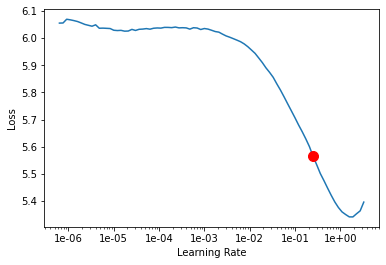

In [39]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [40]:
learn.fit_one_cycle(10,9e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.186600,4.197869,0.235402,00:11
1,4.434629,3.686963,0.284821,00:11
2,3.995181,3.620111,0.295804,00:11
3,3.685638,3.573627,0.303393,00:11
4,3.444272,3.558818,0.304509,00:11
5,3.250579,3.566800,0.307545,00:11
6,3.081750,3.555176,0.309509,00:12
7,2.938171,3.534916,0.312366,00:12
8,2.828262,3.530657,0.313304,00:12
9,2.760753,3.528935,0.314643,00:12


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 1.74E-04


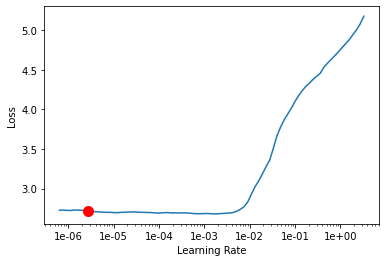

In [41]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [42]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.695773,3.573883,0.315804,00:16
1,2.632284,3.560625,0.322321,00:17
2,2.540842,3.615887,0.322589,00:17
3,2.433837,3.631408,0.324420,00:17
4,2.346615,3.654469,0.323080,00:17


In [43]:
learn.save_encoder(f'{topic}_ml_encoder_v1')

In [44]:
learn.load_encoder(f'{topic}_ml_encoder_v1');

In [45]:
learn.save(f'{topic}_model_v1')

In [46]:
learn.load(f'{topic}_model_v1');

In [47]:
learn = text_classifier_learner(data_clas, AWD_LSTM, pretrained=pretrained_model, drop_mult=.5)

In [48]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [49]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [50]:
learn.save('learner-1stage')

In [51]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-02


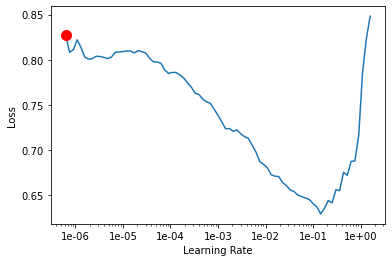

In [52]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [53]:
learn.fit_one_cycle(10,5e-7,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.786199,0.809728,0.407468,00:10
1,0.784731,0.818413,0.407787,00:11
2,0.788657,0.794159,0.419260,00:10
3,0.760174,0.802680,0.409047,00:11
4,0.754775,0.813125,0.403602,00:10
5,0.757046,0.799221,0.424231,00:11
6,0.738501,0.804740,0.406272,00:10
7,0.746789,0.796309,0.431145,00:10
8,0.744560,0.790210,0.416451,00:10
9,0.746806,0.785500,0.415668,00:10


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [54]:
learn.save('learner-2stage')

In [55]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.09E-02


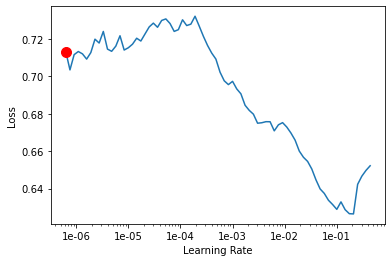

In [56]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [57]:
learn.fit_one_cycle(5,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.506808,0.599668,0.565438,00:10
1,0.453750,0.656765,0.559754,00:09
2,0.475753,0.628972,0.541476,00:09
3,0.430959,0.607023,0.578508,00:11
4,0.425968,0.648245,0.544895,00:10


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [58]:
learn.save('learner-3stage')

In [59]:
learn.load('learner-3stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.74E-06


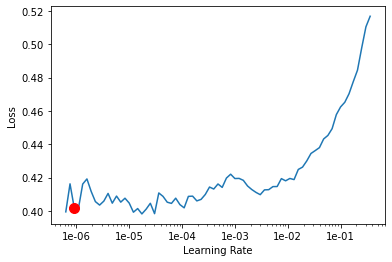

In [60]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(10,(1e-6)/10,moms=(0.8, 0.7))#no executado

epoch,train_loss,valid_loss,accuracy,f_beta,f_beta,f1,time
0,0.147322,0.553450,0.755418,0.755418,0.723700,0.793209,00:10
1,0.168347,0.559668,0.761610,0.761610,0.736740,0.797670,00:10
2,0.170659,0.546324,0.755418,0.755418,0.723700,0.793629,00:10
3,0.162554,0.557600,0.758514,0.758514,0.724149,0.796961,00:10
4,0.162834,0.549410,0.767802,0.767802,0.733780,0.802407,00:11
5,0.160677,0.555575,0.770898,0.770898,0.738374,0.806861,00:09
6,0.177321,0.561412,0.758514,0.758514,0.728261,0.795212,00:10
7,0.167102,0.561033,0.767802,0.767802,0.745693,0.801102,00:10


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.58E-05


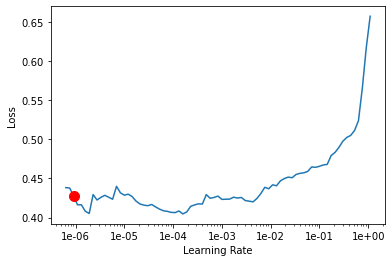

In [61]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [65]:
learn.fit_one_cycle(3, moms=(0.8, 0.7));#no executado

epoch,train_loss,valid_loss,f1_macro,time
0,0.428576,0.640014,0.563754,00:12
1,0.418685,0.582154,0.571561,00:12
2,0.360446,0.601644,0.568143,00:12


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 2.51E-04


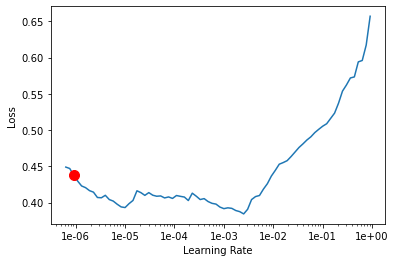

In [62]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [63]:
learn.fit_one_cycle(3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.429638,0.581880,0.579089,00:21
1,0.368093,0.533427,0.589179,00:19
2,0.279268,0.568061,0.564695,00:21


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [64]:
learn.save('learner-freeze-3');

In [65]:
learn.load('learner-freeze-3');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


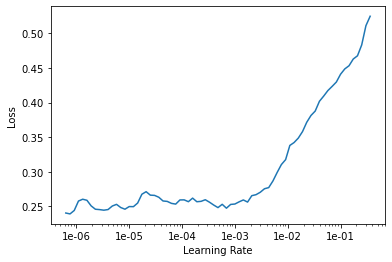

In [66]:
learn.lr_find(); learn.recorder.plot()

In [71]:
learn.fit_one_cycle(3, moms=(0.8, 0.7)) #no executado

epoch,train_loss,valid_loss,f1_macro,time
0,0.239545,0.606184,0.633880,00:20
1,0.258970,0.540787,0.687646,00:21
2,0.212354,0.678200,0.598243,00:20
3,0.136688,0.683997,0.664183,00:20
4,0.109586,0.712703,0.657944,00:21


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


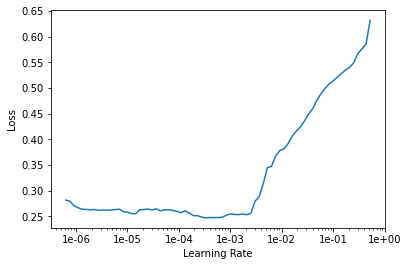

In [67]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [68]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.283712,0.637454,0.579519,00:26
1,0.275273,0.453360,0.679173,00:26
2,0.219921,0.589097,0.654539,00:25
3,0.128210,0.629596,0.687301,00:27
4,0.086374,0.748167,0.609761,00:26


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [69]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

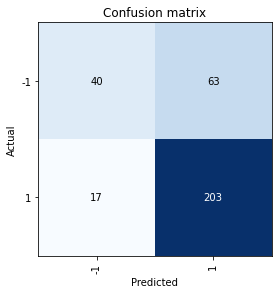

In [70]:
interp.plot_confusion_matrix()

In [71]:
learn.save('learner-final');